In [3]:
import pandas as pd

In [4]:
# Data ingestion
DATASET_LOC = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv"
df = pd.read_csv(DATASET_LOC)
df.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


In [5]:
from sklearn.model_selection import train_test_split

In [7]:
df.tag.value_counts()

tag
natural-language-processing    310
computer-vision                285
other                          106
mlops                           63
Name: count, dtype: int64

In [8]:
# Split dataset
test_size = 0.2
train_df, val_df = train_test_split(df, stratify=df.tag, test_size=test_size, random_state=1234)

## EDA

### Exploration & Check

In [11]:
(train_df.tag.value_counts() / len(train_df)) * 100

tag
natural-language-processing    40.589198
computer-vision                37.315876
other                          13.911620
mlops                           8.183306
Name: count, dtype: float64

In [12]:
(val_df.tag.value_counts() / len(val_df)) * 100

tag
natural-language-processing    40.522876
computer-vision                37.254902
other                          13.725490
mlops                           8.496732
Name: count, dtype: float64

In [13]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import warnings; warnings.filterwarnings("ignore")
from wordcloud import WordCloud, STOPWORDS

In [18]:
all_tags = Counter(train_df.tag)
print(all_tags.most_common())

[('natural-language-processing', 248), ('computer-vision', 228), ('other', 85), ('mlops', 50)]


### Target Distribution - Train

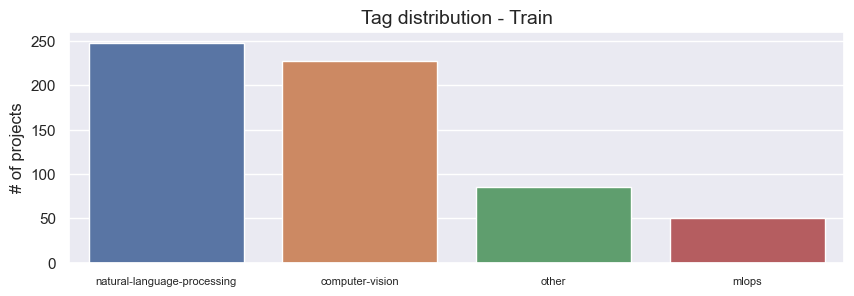

In [25]:
# Plot tag frequencies
tags, tag_counts = zip(*Counter(train_df.tag).most_common())

plt.figure(figsize=(10, 3))

ax = sns.barplot(x=list(tags), y=list(tag_counts))
ax.set_xticklabels(tags, rotation=0, fontsize=8)

plt.title("Tag distribution - Train", fontsize=14)
plt.ylabel("# of projects", fontsize=12)
plt.show()

### Wordcloud - Train

#### Title

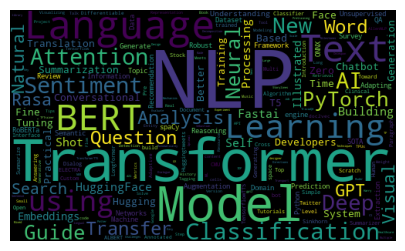

In [36]:
# Most frequent tokens for each tag
tag="natural-language-processing"
plt.figure(figsize=(10, 3))
subset_train = train_df[train_df.tag==tag]
text_train = subset_train.title.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text_train))
plt.axis("off")
plt.imshow(cloud)

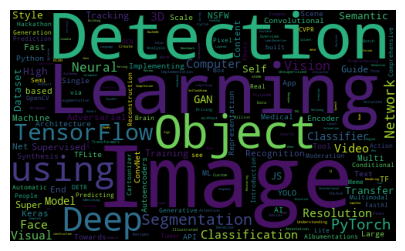

In [32]:
# Most frequent tokens for each tag
tag="computer-vision"
plt.figure(figsize=(10, 3))
subset_train = train_df[train_df.tag==tag]
text_train = subset_train.title.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text_train))
plt.axis("off")
plt.imshow(cloud)

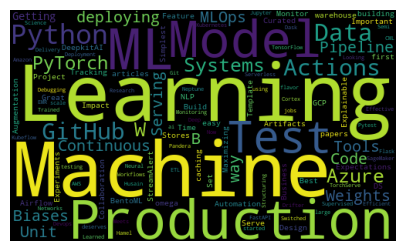

In [33]:
# Most frequent tokens for each tag
tag="mlops"
plt.figure(figsize=(10, 3))
subset_train = train_df[train_df.tag==tag]
text_train = subset_train.title.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text_train))
plt.axis("off")
plt.imshow(cloud)

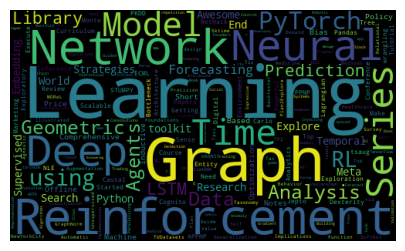

In [34]:
# Most frequent tokens for each tag
tag="other"
plt.figure(figsize=(10, 3))
subset_train = train_df[train_df.tag==tag]
text_train = subset_train.title.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text_train))
plt.axis("off")
plt.imshow(cloud)

#### Description

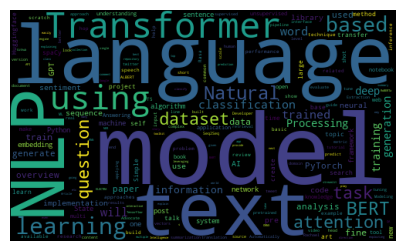

In [37]:
# Most frequent tokens for each tag
tag="natural-language-processing"
plt.figure(figsize=(10, 3))
subset_train = train_df[train_df.tag==tag]
text_train = subset_train.description.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text_train))
plt.axis("off")
plt.imshow(cloud)

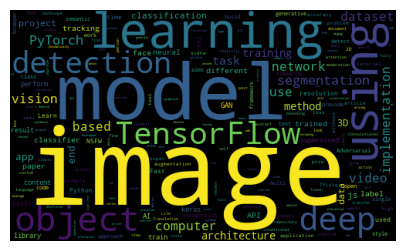

In [38]:
# Most frequent tokens for each tag
tag="computer-vision"
plt.figure(figsize=(10, 3))
subset_train = train_df[train_df.tag==tag]
text_train = subset_train.description.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text_train))
plt.axis("off")
plt.imshow(cloud)

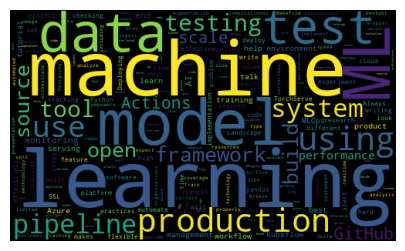

In [39]:
# Most frequent tokens for each tag
tag="mlops"
plt.figure(figsize=(10, 3))
subset_train = train_df[train_df.tag==tag]
text_train = subset_train.description.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text_train))
plt.axis("off")
plt.imshow(cloud)

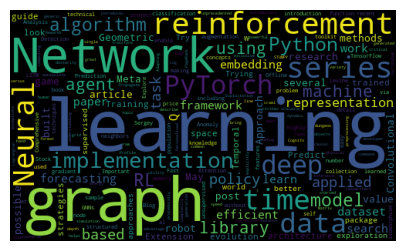

In [40]:
# Most frequent tokens for each tag
tag="other"
plt.figure(figsize=(10, 3))
subset_train = train_df[train_df.tag==tag]
text_train = subset_train.description.values
cloud = WordCloud(
    stopwords=STOPWORDS, background_color="black", collocations=False,
    width=500, height=300).generate(" ".join(text_train))
plt.axis("off")
plt.imshow(cloud)

## Data Preprocessing

In [42]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

### Feature Engineering

In [43]:
# Input
df["text"] = df.title + " " + df.description

### Cleaning

In [44]:
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arnaudgueulette/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
def clean_text(text, stopwords=STOPWORDS):
    """Clean raw text string."""
    # Lower
    text = text.lower()

    # Remove stopwords
    pattern = re.compile(r'\b(' + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub('', text)

    # Spacing and filters
    text = re.sub(r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text)  # add spacing
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()  # strip white space at the ends
    text = re.sub(r"http\S+", "", text)  #  remove links

    return text

In [49]:
original_df = df.copy()

In [50]:
original_df.text = original_df.text.apply(lambda text: clean_text(text, STOPWORDS))

In [51]:
print (f"{original_df.text.values[0]}\n{df.text.values[0]}")

comparison yolo rcnn real world videos bringing theory experiment cool easily train models colab find results minutes
Comparison between YOLO and RCNN on real world videos Bringing theory to experiment is cool. We can easily train models in colab and find the results in minutes.


### Filtering

In [52]:
# DataFrame cleanup
df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")  # drop cols
df = df.dropna(subset=["tag"])  # drop nulls
df = df[["text", "tag"]]  # rearrange cols
df.head()

,text,tag
0,Comparison between YOLO and RCNN on real world...,computer-vision
1,"Show, Infer & Tell: Contextual Inference for C...",computer-vision
2,Awesome Graph Classification A collection of i...,other
3,Awesome Monte Carlo Tree Search A curated list...,other
4,"AttentionWalk A PyTorch Implementation of ""Wat...",other


In [53]:
df.text = df.text.apply(lambda text: clean_text(text, STOPWORDS))

In [54]:
df.head()

,text,tag
0,comparison yolo rcnn real world videos bringin...,computer-vision
1,show infer tell contextual inference creative ...,computer-vision
2,awesome graph classification collection import...,other
3,awesome monte carlo tree search curated list m...,other
4,attentionwalk pytorch implementation watch ste...,other


### Encoding

In [55]:
# Label to index
tags = train_df.tag.unique().tolist()
num_classes = len(tags)

In [58]:
list(enumerate(tags))

[(0, 'mlops'),
 (1, 'natural-language-processing'),
 (2, 'computer-vision'),
 (3, 'other')]

In [59]:
class_to_index = {tag: i for i, tag in enumerate(tags)}
class_to_index

{'mlops': 0,
 'natural-language-processing': 1,
 'computer-vision': 2,
 'other': 3}

In [61]:
df.tag = df.tag.map(class_to_index)

In [62]:
df.head()

,text,tag
0,comparison yolo rcnn real world videos bringin...,2
1,show infer tell contextual inference creative ...,2
2,awesome graph classification collection import...,3
3,awesome monte carlo tree search curated list m...,3
4,attentionwalk pytorch implementation watch ste...,3


In [63]:
index_to_class = {idx: tag for idx, tag in enumerate(tags)}

### Tokenizer

In [66]:
import numpy as np
from transformers import BertTokenizer

In [67]:
# Bert tokenizer
tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased",
                                          return_dict=False)

# Check
text = "Transfer learning with transformers for text classification."

# Encoding
encoded_inputs = tokenizer([text],
                           return_tensors="np",
                           padding="longest")  # pad to longest item in batch

In [68]:
print ("input_ids:", encoded_inputs["input_ids"])
print ("attention_mask:", encoded_inputs["attention_mask"])

input_ids: [[  102  2268  1904   190 29155   168  3267  2998   205   103]]
attention_mask: [[1 1 1 1 1 1 1 1 1 1]]


In [69]:
print (tokenizer.decode(encoded_inputs["input_ids"][0]))

[CLS] transfer learning with transformers for text classification. [SEP]


In [76]:
def tokenize(batch):
    # Bert Tokenizer
    tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased",
                                              return_dict=False)
    # Encoding
    encoded_inputs = tokenizer(batch['text'].tolist(),
                               return_tensors="np",
                               padding="longest")
    # Results
    return {"ids": encoded_inputs["input_ids"],
            "mask": encoded_inputs['attention_mask'],
            "target": batch['tag'].values
    }

In [78]:
tokenize(df.head(n=1))

{'ids': array([[  102,  2029,  1778,   609,  6446,  4857,  1332,  2399, 13572,
         19125,  1983,  1954,  6240,  3717,  7434,  1262,   537,   201,
          1040,   545,  4714,   103]]),
 'mask': array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]),
 'target': array([2])}

In [79]:
def preprocess(df, class_to_index):
    
    """Preprocess the data."""
    df["text"] = df.title + " " + df.description  # feature engineering
    df["text"] = df.text.apply(clean_text)  # clean text
    df = df.drop(columns=["id", "created_on", "title", "description"], errors="ignore")  # clean dataframe
    df = df[["text", "tag"]]  # rearrange columns
    df["tag"] = df["tag"].map(class_to_index)  # label encoding
    outputs = tokenize(df)
    return outputs

In [82]:
DATASET_LOC = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/dataset.csv"
df = pd.read_csv(DATASET_LOC)

In [84]:
dataset = preprocess(df, class_to_index)

In [85]:
dataset

{'ids': array([[ 102, 2029, 1778, ...,    0,    0,    0],
        [ 102,  405, 4920, ...,    0,    0,    0],
        [ 102, 9559,  123, ...,    0,    0,    0],
        ...,
        [ 102, 1937, 2561, ...,    0,    0,    0],
        [ 102, 3997, 1904, ...,    0,    0,    0],
        [ 102, 9461, 3732, ...,    0,    0,    0]]),
 'mask': array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]]),
 'target': array([2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 0, 2, 2, 2,
        1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 2, 1, 0, 2, 1, 2, 1, 3, 2,
        3, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 3, 1, 3, 2, 1, 2, 2, 3,
        3, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 3, 3, 3, 2,
        1, 1, 2, 2, 1, 2, 0, 1, 2, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 